In [ ]:
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

#data exploration

In [ ]:
data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


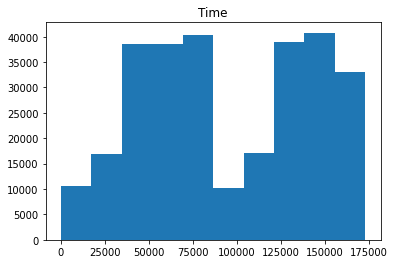

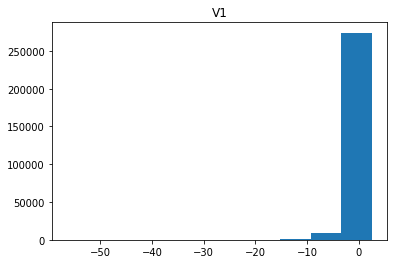

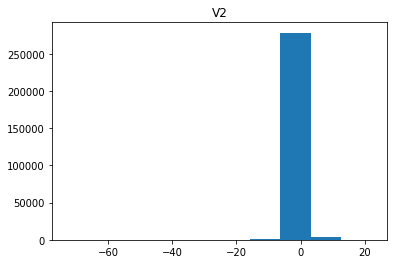

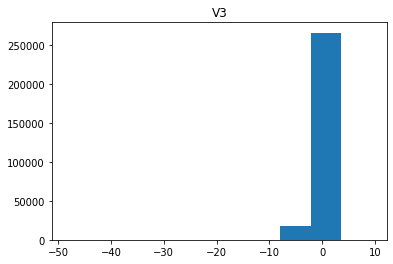

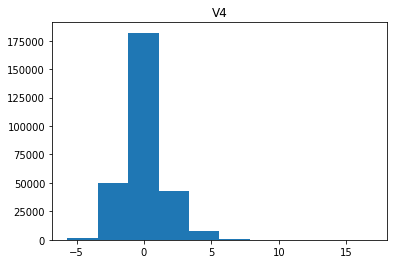

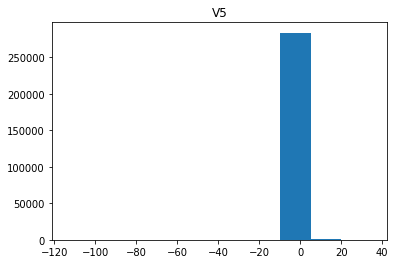

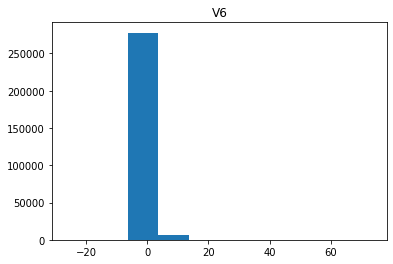

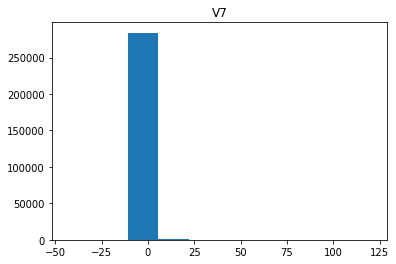

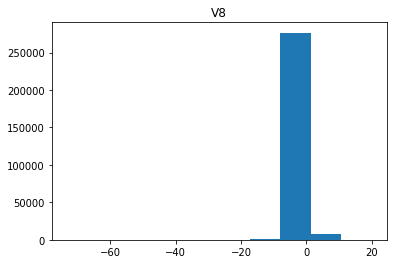

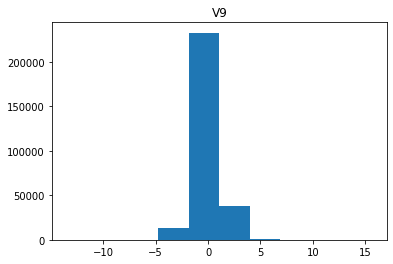

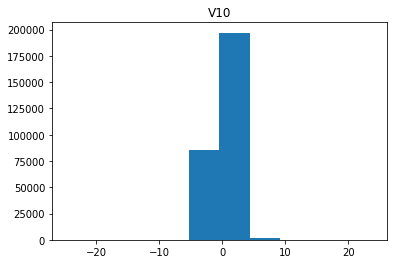

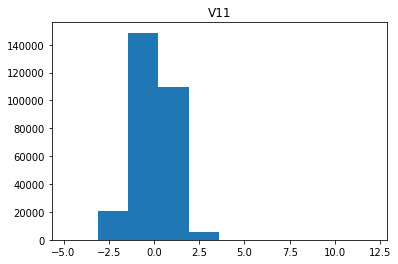

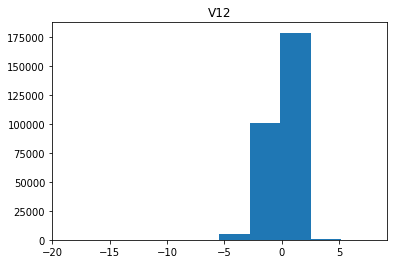

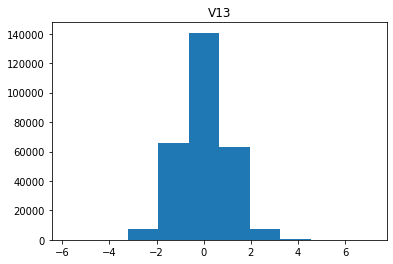

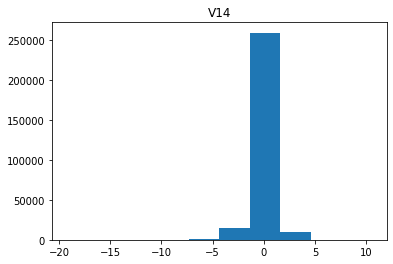

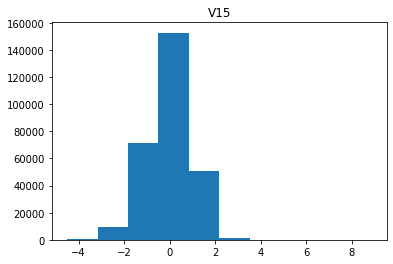

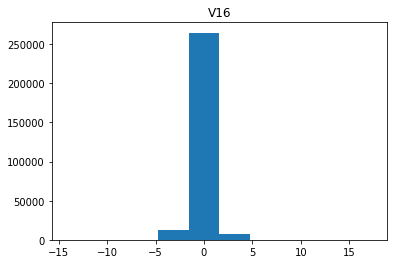

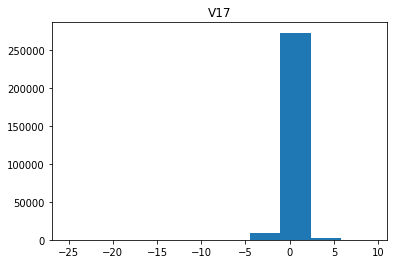

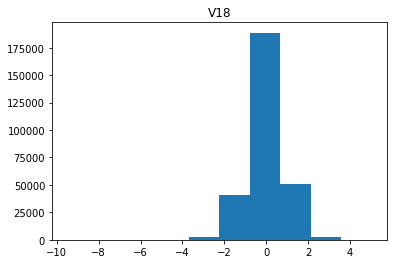

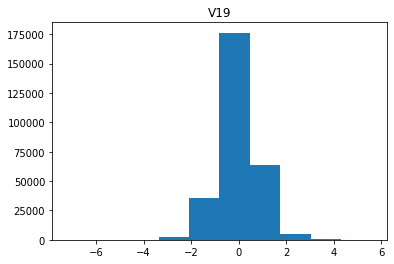

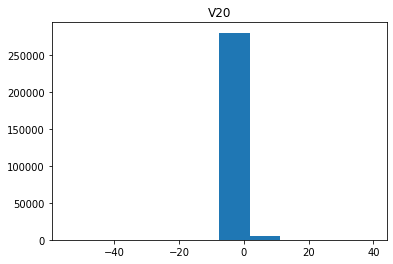

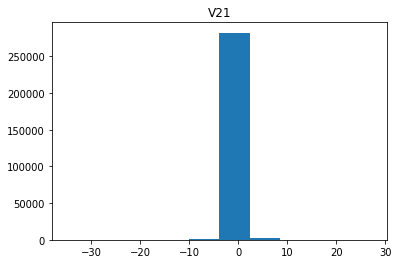

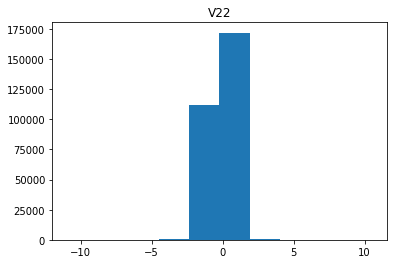

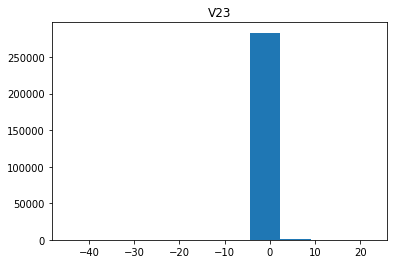

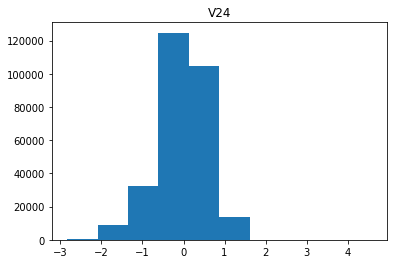

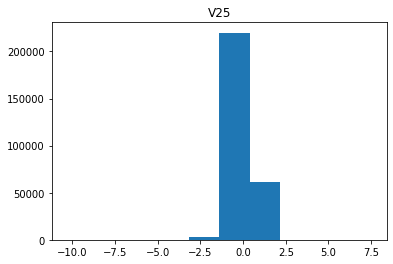

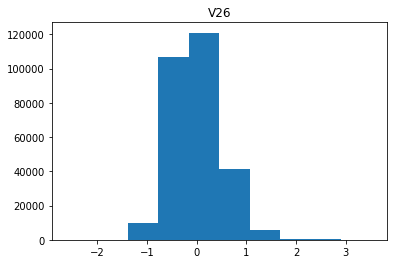

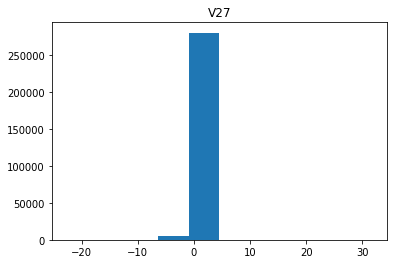

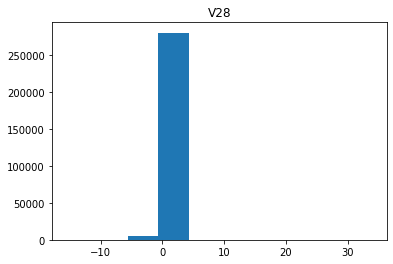

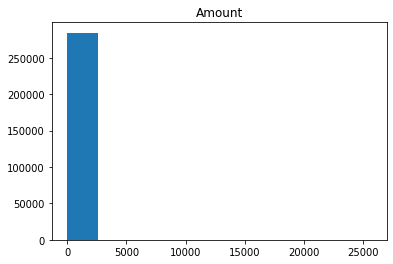

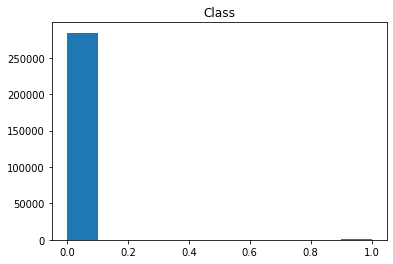

In [ ]:
#histogram
import seaborn as sns
for i, col in enumerate(data.columns):
    plt.figure(i)
    plt.hist(data[col])
    f= plt.gca()
    f.set_title(data.columns.values[i])

In [ ]:
len(data[data.Class==1])

492

In [ ]:
len(data[data.Class==0])

284315

* we observe this is a imbalanced dataset becouse there is a large presence of 0

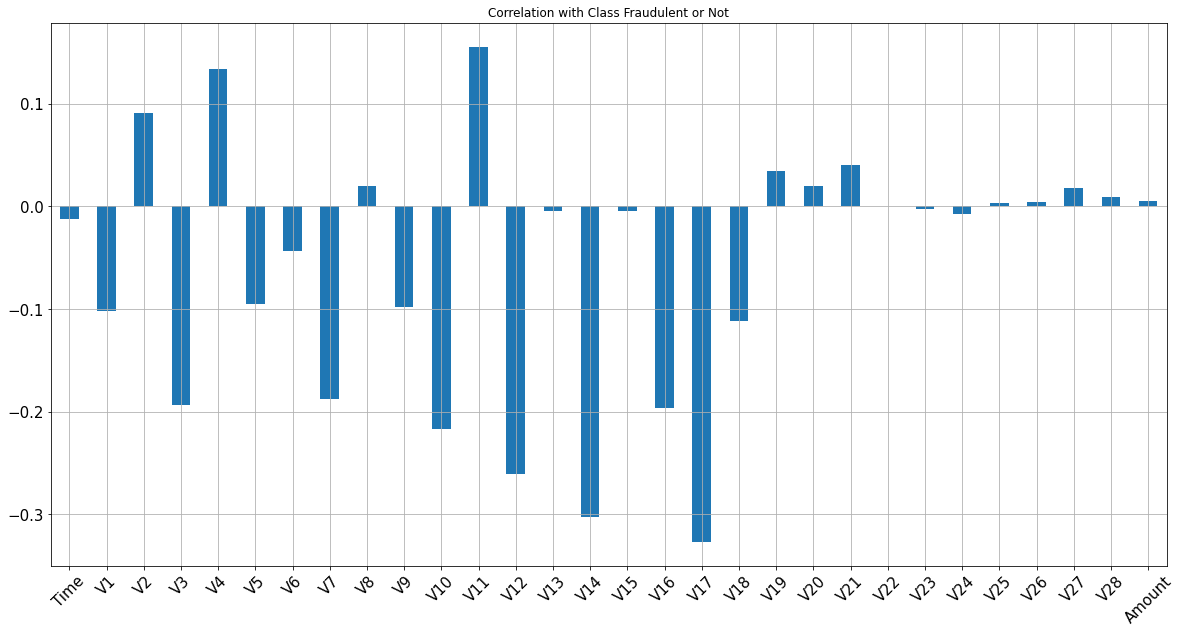

In [ ]:
## Linear Correlation with Response Variable (Note: Models like RandomForest are not linear)
data1 = data.drop(columns = ['Class'])   # drop non numerical columns
data1.corrwith(data.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class Fraudulent or Not", fontsize = 15,
        rot = 45, grid = True,)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
data["normalized_amnt"] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data.drop(['Amount'],axis=1,inplace=True)
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amnt
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686


In [ ]:
data.drop('Time',axis=1,inplace=True)


In [ ]:
data.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amnt
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.5516,-0.617801,-0.99139,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964


In [ ]:
x = data.iloc[:,data.columns != 'Class']
y = data.iloc[:,data.columns == 'Class']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42 )

In [ ]:
x_train.shape

(199364, 29)

In [ ]:
x_test.shape

(85443, 29)

In [ ]:
x_test.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'normalized_amnt'],
      dtype='object')

#model selection
*decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier()
sc = cross_val_score(clf, x_train, y_train, cv=10)


In [ ]:
import numpy as np
np.average(sc)

0.9990469711231631

In [ ]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
# Confusion matrix on the test dataset
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix= confusion_matrix(y_test,y_pred)


In [ ]:
print(confusion_matrix)

[[85266    41]
 [   30   106]]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, plot_roc_curve

In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
### Store results in dataframe for comparing various Models
results_testset = pd.DataFrame([['DecisionTree', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,DecisionTree,0.999169,0.220588,0.779412,0.721088,0.749117


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


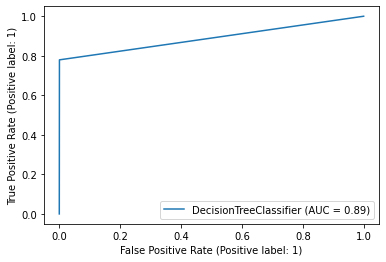

In [ ]:
ROC_DT = plot_roc_curve(clf, x_test, y_test)
plt.show()

#random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rand_f = RandomForestClassifier(n_estimators=100,min_samples_leaf=5)

In [ ]:
rand_f.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(min_samples_leaf=5)

In [ ]:
y_pred= rand_f.predict(x_test)

In [ ]:
rand_f.score(x_test,y_test)

0.9995669627705019

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test,y_pred)

In [ ]:
print(confusion_matrix)

[[85298     9]
 [   28   108]]


In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
res = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(res,ignore_index = True)

# ### Store results in dataframe for comparing various Models
# model_results = pd.DataFrame([['DecisionTree', acc, 1-rec, rec, prec, f1]],
#                columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
# results_testset = results_testset.append(model_results, ignore_index = True)
# results_testset

In [ ]:
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,DecisionTree,0.999169,0.220588,0.779412,0.721088,0.749117
1,RandomForest,0.999567,0.205882,0.794118,0.923077,0.853755


#deep learning
using a simple neural network,and RELU as a activation function.last node has 2 output so i used a sigmoid which outputs probablity and clasify the output 1 or 0.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),   # input of 29 columns as shown above
    Dense(units=25,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                480       
                                                                 
 dense_16 (Dense)            (None, 25)                425       
                                                                 
 dropout_3 (Dropout)         (None, 25)                0         
                                                                 
 dense_17 (Dense)            (None, 24)                624       
                                                                 
 dense_18 (Dense)            (None, 24)                600       
                                                                 
 dense_19 (Dense)            (None, 1)                 25        
                                                                 
Total params: 2,154
Trainable params: 2,154
Non-traina

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
13291/13291 [==============================] - 27s 2ms/step - loss: 0.0086 - accuracy: 0.9990
Epoch 2/5
13291/13291 [==============================] - 26s 2ms/step - loss: 0.0041 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 27s 2ms/step - loss: 0.0037 - accuracy: 0.9994
Epoch 4/5
13291/13291 [==============================] - 27s 2ms/step - loss: 0.0035 - accuracy: 0.9993
Epoch 5/5
13291/13291 [==============================] - 26s 2ms/step - loss: 0.0033 - accuracy: 0.9994


In [ ]:
score = model.evaluate(x_test, y_test)
print(score)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test,y_pred)

In [ ]:
print(confusion_m)

In [ ]:
acc1 = accuracy_score(y_test, y_pred.round())
prec1 = precision_score(y_test, y_pred.round())
rec1 = recall_score(y_test, y_pred.round())
f11 = f1_score(y_test, y_pred.round())

In [ ]:
prec1

In [ ]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['simple_N_N', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

## Undersampling
- we have a unbalanced dataset, In order to balance the train set, another technique is undersampling. With this technique, we adjust the largest class to match the number of samples of the under-represented class. Here we want to randomly pick an amount of non-fraudulent transactions equal to the number of fraudulent transactions in the dataset.

In [ ]:
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

In [ ]:
not_F_indices = data[data.Class == 0].index
len(not_F_indices)

In [ ]:
# Random select N indices from non fraudulent samples (N equals to number of fraudulent records)
random_normal_indices = np.random.choice(not_F_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

In [ ]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

In [ ]:
under_sample_data = data.iloc[under_sample_indices,:]

In [ ]:
under_sample_data.shape

(984, 30)

In [ ]:
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample,y_undersample, test_size=0.3)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
46/46 [==============================] - 1s 2ms/step - loss: 0.5084 - accuracy: 0.9113
Epoch 2/5
46/46 [==============================] - 0s 2ms/step - loss: 0.2316 - accuracy: 0.9360
Epoch 3/5
46/46 [==============================] - 0s 2ms/step - loss: 0.1644 - accuracy: 0.9346
Epoch 4/5
46/46 [==============================] - 0s 2ms/step - loss: 0.1391 - accuracy: 0.9404
Epoch 5/5
46/46 [==============================] - 0s 2ms/step - loss: 0.1434 - accuracy: 0.9433


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                480       
                                                                 
 dense_16 (Dense)            (None, 25)                425       
                                                                 
 dropout_3 (Dropout)         (None, 25)                0         
                                                                 
 dense_17 (Dense)            (None, 24)                624       
                                                                 
 dense_18 (Dense)            (None, 24)                600       
                                                                 
 dense_19 (Dense)            (None, 1)                 25        
                                                                 
Total params: 2,154
Trainable params: 2,154
Non-traina

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())

In [ ]:
cnf_matrix

array([[146,   2],
       [ 12, 136]])

In [ ]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [ ]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['UnderSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,DecisionTree,0.999169,0.220588,0.779412,0.721088,0.749117
1,RandomForest,0.999567,0.205882,0.794118,0.923077,0.853755
2,simple_N_N,0.999567,0.205882,0.794118,0.923077,0.853755
3,UnderSampledNeuralNetwork,0.952703,0.081081,0.918919,0.985507,0.951049


false neg rate is reduced model predicts correctly lets try with
##over sampling

* in this technique the minority values are increased and made to the same level of the minority
* this can be done by smote method

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_resample, y_resample = SMOTE().fit_resample(x,y.values.ravel())

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=10)

Epoch 1/10
46/46 [==============================] - 1s 2ms/step - loss: 0.5654 - accuracy: 0.6672
Epoch 2/10
46/46 [==============================] - 0s 2ms/step - loss: 0.3893 - accuracy: 0.8474
Epoch 3/10
46/46 [==============================] - 0s 2ms/step - loss: 0.2996 - accuracy: 0.8866
Epoch 4/10
46/46 [==============================] - 0s 2ms/step - loss: 0.2536 - accuracy: 0.9157
Epoch 5/10
46/46 [==============================] - 0s 2ms/step - loss: 0.2300 - accuracy: 0.9230
Epoch 6/10
46/46 [==============================] - 0s 2ms/step - loss: 0.2084 - accuracy: 0.9288
Epoch 7/10
46/46 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.9346
Epoch 8/10
46/46 [==============================] - 0s 2ms/step - loss: 0.1911 - accuracy: 0.9346
Epoch 9/10
46/46 [==============================] - 0s 2ms/step - loss: 0.1782 - accuracy: 0.9390
Epoch 10/10
46/46 [==============================] - 0s 2ms/step - loss: 0.1675 - accuracy: 0.9419


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
con= confusion_matrix(y_test,y_pred.round())

In [ ]:
con

array([[144,   4],
       [ 13, 135]])

In [ ]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [ ]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['OverSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,DecisionTree,0.999169,0.220588,0.779412,0.721088,0.749117
1,RandomForest,0.999567,0.205882,0.794118,0.923077,0.853755
2,simple_N_N,0.999567,0.205882,0.794118,0.923077,0.853755
3,UnderSampledNeuralNetwork,0.952703,0.081081,0.918919,0.985507,0.951049
4,OverSampledNeuralNetwork,0.942568,0.087838,0.912162,0.971223,0.940767


# we can choose undersampledNeuralNetwrk as the best model 
becouse it greatly reduces the false neg rate 